In [2]:
import time
import simpleaudio as sa
from threading import Thread
import numpy as np
import matplotlib.pyplot as plt
import retro

In [3]:
## trivial_random_agent.py

audio = []

env = retro.make(game='Airstriker-Genesis')
obs = env.reset()
# while True:
for i in range(1000):
    obs, rew, done, info = env.step(env.action_space.sample())
    _ = env.render(close=True)
    aud = env.em.get_audio()
    rate = env.em.get_audio_rate()
    audio.append((aud, rate))
    if done:
        obs = env.reset()
env.close()

In [22]:
env.close()

In [25]:
class sound():
    def play(self, array, fs):
        sa.play_buffer(array, 2, 2, 44100)

mysound = sound()

# env = retro.make(game='Airstriker-Genesis')
env = retro.make(game='Pong-Atari2600')
obs = env.reset()
count = 0

# audio = np.zeros(524)

audio = []
check_pitch = False

PLAY = True

for i in range(6000):
    obs, rew, done, info = env.step(env.action_space.sample())

    _ = env.render()
    a = env.em.get_audio()
    mono = env.em.get_audio()[:,0]
    b = env.em.get_audio_rate()
    pitch = 0
    if check_pitch:
        check_pitch = False
        for i in range(len(mono) - 1):
            if (mono[i] == 0) and (mono[i+1] != 0):
                for j in range(i+1,len(mono)):
                    if mono[j] == 0:
                        break
                    pitch += 1
                break
    if mono.any():
        check_pitch = True
    audio.append(pitch)
#     audio = np.hstack((audio,mono))
#     audio.append(mono)
    if PLAY and a.any():
        time.sleep(524.0/31400.0)
#         time.sleep(1.0/90.0)
        thread = Thread(target = mysound.play, args=(a,b,))
        thread.start()
    if done:
        obs = env.reset()
env.close()

KeyboardInterrupt: 

In [26]:
obs.shape

(210, 160, 3)

In [28]:
a.shape

(524, 2)

In [24]:
a,b

(array([[15360, 15360],
        [15360, 15360],
        [15360, 15360],
        ...,
        [    0,     0],
        [    0,     0],
        [15360, 15360]], dtype=int16), 31400.0)

In [23]:
audio

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 22,
 22,
 22,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 66,
 66,
 66,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,

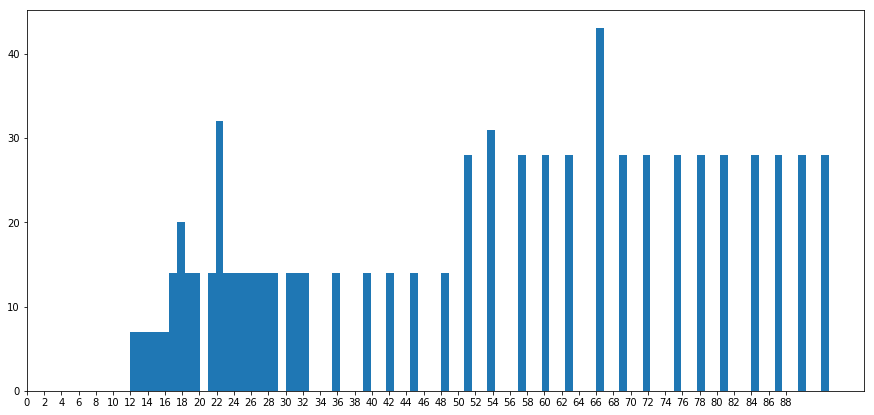

In [67]:
fig, axes = plt.subplots(1, 1, figsize=(15, 7))
# axes[0].set_title('audio')
_ = plt.hist([i for i in audio if i], bins=90)
_ = plt.xticks(np.arange(0,90,2))

In [283]:
audio2 = audio.copy()

Text(0.5,1,'audio')

Text(0.5,1,'95000 - 105000')

Text(0.5,1,'132500 - 142500')

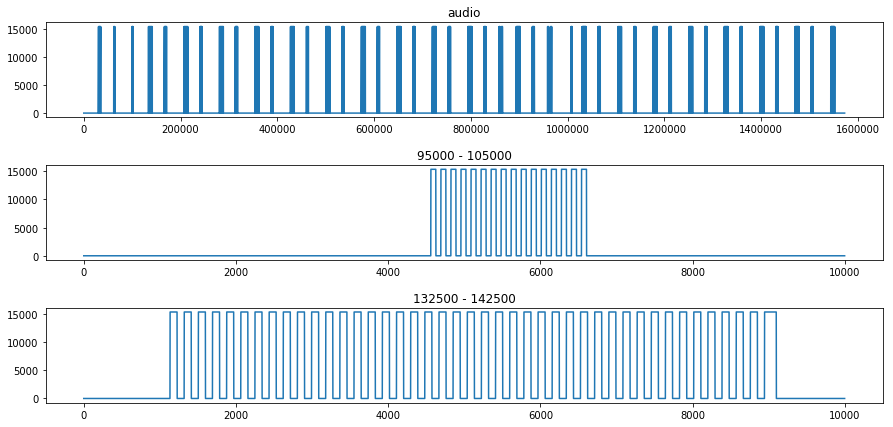

In [281]:
fig, axes = plt.subplots(3, 1, figsize=(15, 7))
axes[0].set_title('audio')
axes[1].set_title('95000 - 105000')
axes[2].set_title('132500 - 142500')
_ = axes[0].plot(audio)
_ = axes[1].plot(audio[95000:105000])
_ = axes[2].plot(audio[132500:142500])
# _ = plt.plot(audio[:400000])
# _ = plt.xlim(-3, 7)
# _ = axes.set_ylabel('P(X)')
# _ = axes.set_xlabel('X')
plt.subplots_adjust(hspace=0.5)

In [ ]:
retro.data.list_games()